<img src="images/GMIT logo.jpeg" width="350" align="center">

# Machine Learning & Statistics Project 2019

<b>Name:</b> Peter McGowan<br>
<b>ID:</b> G00190832

## Introduction
This jupyter notebook contains an investigation of the Boston House Prices dataset for the "Machine-Learning and Statistics" Module on the GMIT HDip in Data Analytics.

## Background
***Add background info here***

## Starting Off
First we will import the required python libraries.

In [1]:
# Import pandas for managing data
# Import scipy.stats for statistical analysis
# Import matplotlib.pyplot and seaborn for visualisations
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

Scikit-learn conveniently provides the Boston House Prices dataset - we will now load it.

In [2]:
# Load the boston dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

We can now output the keys<sup>[1](#myfootnote1)</sup> of the dataset:

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

This consists of 5 elements:
* data: The contents of the dataset excluding the target
* target: The contents of the target (i.e. MEDV) column
* feature_names: The column headers for the data columns
* DESCR: The characteristics of the dataset, formatted
* filename: The filepath to where the dataset is installed

The pandas library includes a versatile "DataFrame" object - an indexed array that helps with managing multi-dimensional data. We will store the dataset in a dataframe, giving it the correct column headers. Pandas will automatically add an index column to this.

In [4]:
# Create a dataframe from the boston house prices dataset
df = pd.DataFrame(boston.data, columns=boston.feature_names)

## Describe

### Checks & Descriptive Statistics

We'll have a look at the head and tail of the data first of all to check for any obvious issues. df.head() will output the first 5 rows and df.tail(0 the last 5 rowes, by default. This should be sufficient.

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


We shoud check also for missing values:

In [7]:
# Append .sum() to count how many values are missing
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

All seems to be in order so far. The column headers seem fairly cryptic so far - fortunately the "DESCR" key can give us more info on this.

In [8]:
# Print to output properly formatted
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The MEDV column hasn't been included in the DataFrame so far. It is included as the "target" column in the dataset from scikit-learn as this is normally the target value for machine learning. We can check that it contains the correct number of rows (506) as follows:

In [9]:
boston.target.shape

(506,)

This matches the output of the DESCR command so it should be ok.
Now we need to add it as a column to the dataframe to make our lives a bit easier later on.

In [10]:
# Explicitly declaring a new column name adds it to the dataframe
df['MEDV'] = boston.target

Now we should output the summary statistics of the DataFrame to see how it looks:

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The data seems to have imported correctly and we now have it in a format that we can work with.

### Visualisations
Now we can start creating plots.
Firstly, the distribution of the Median House Value:

Text(0.5, 1.0, 'Distribution of Median House Value')

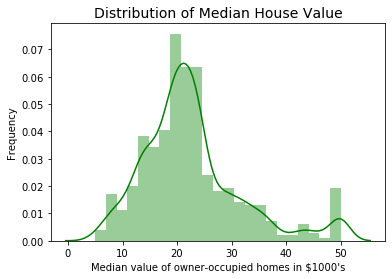

In [12]:
sns.distplot(df['MEDV'], color='g')
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value', fontsize=14)

We can also look at the number of rooms per dwelling like this.

Text(0.5, 1.0, 'Distribution of Rooms')

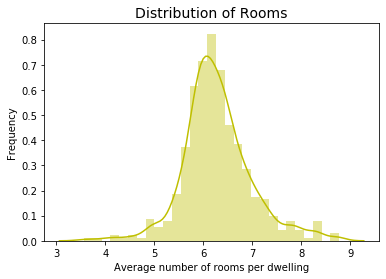

In [13]:
sns.distplot(df['RM'], color='y')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.title('Distribution of Rooms', fontsize=14)

What about the relationships between some of the statistics and the median house value?
Firstly we look at DIS:

Text(0.5, 1.0, 'MEDV vs DIS')

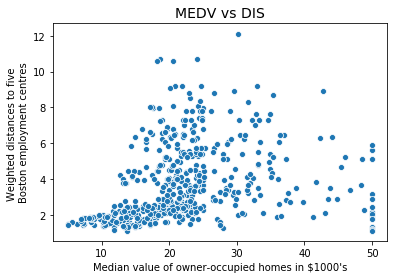

In [14]:
sns.scatterplot(x='MEDV', y='DIS', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')

plt.ylabel('Weighted distances to five \nBoston employment centres')
plt.title('MEDV vs DIS', fontsize=14)

It is difficult to tell if a definite linear relationship exists between these variables, but an unusual vertical line of values on the MEDV=50 line stand out somewhat.

We can look at RAD also:

Text(0.5, 1.0, 'MEDV vs RM')

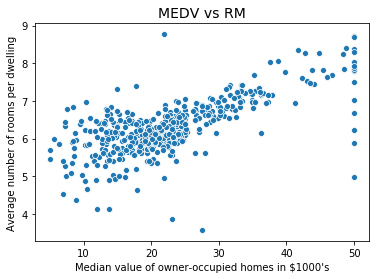

In [15]:
sns.scatterplot(x='MEDV', y='RM', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Average number of rooms per dwelling')
plt.title('MEDV vs RM', fontsize=14)

The linear relationship is much more apparent here - however the clustering of points on the MEDV=50 mark is even more apparent in this plot. This will require further investigation. 

Text(0.5, 1.0, 'MEDV vs RAD')

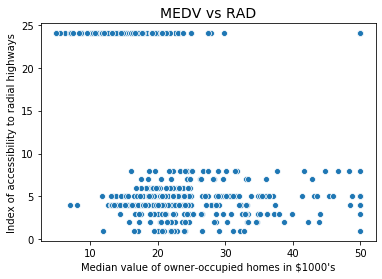

In [16]:
sns.scatterplot(x='MEDV', y='RAD', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Index of accessibility to radial highways')
plt.title('MEDV vs RAD', fontsize=14)

This is quite a bit different to the other plots - the RAD value refers to "index of accessibility to major highways" - it appears that there is a broad range of houses values that have an accessibility rating between 0 and 10, then a very large gap, with a range of houses in the low- to medium price range (with a single high price outlier) with a much higher index of around 24.

Next, we can use a box and whisker plot to look at some of the descriptive statistics of the variables.

Text(0.5, 1, 'Box and Whisker Plots for Each Variable')

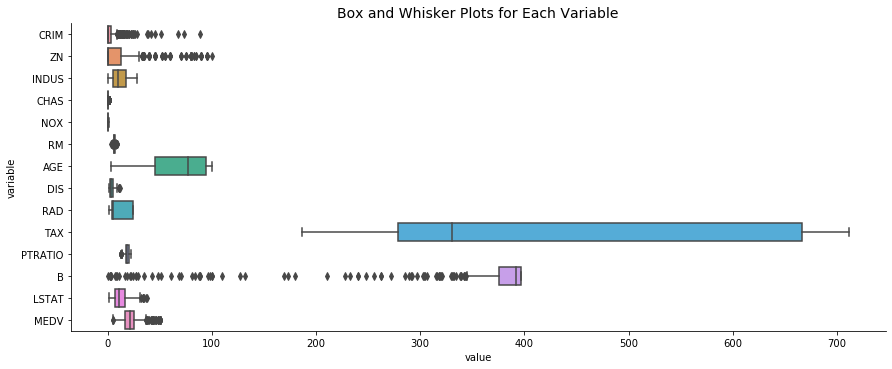

In [17]:
g = sns.catplot(x='value', y='variable', data=pd.melt(df), kind='box', height=5, aspect=2.5);
plt.title('Box and Whisker Plots for Each Variable', fontsize=14)

Clearly, they all have very distinctive characteristics - but we already have most of this information in numerical format. What this really tells us is that certain (most) variables have a good number of outliers - this should be a consideration in development of our neural network later.

## Infer

Text(0.5, 1.0, 'MEDV vs CHAS')

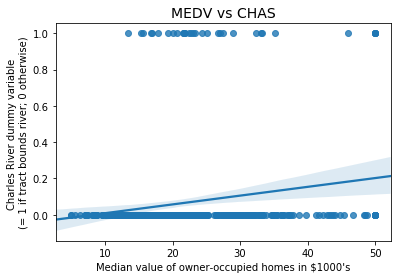

In [18]:
sns.regplot(x='MEDV', y='CHAS', data=df)
plt.xlabel('Median value of owner-occupied homes in $1000\'s')
plt.ylabel('Charles River dummy variable \n(= 1 if tract bounds river; 0 otherwise)')
plt.title('MEDV vs CHAS', fontsize=14)

Text(0.5, 1, 'CHAS vs MEDV')

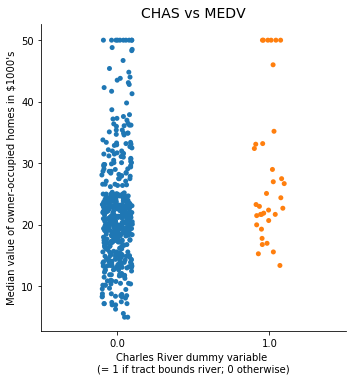

In [19]:
sns.catplot(x='CHAS', y='MEDV',  data=df)
plt.xlabel('Charles River dummy variable \n(= 1 if tract bounds river; 0 otherwise)')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.title('CHAS vs MEDV', fontsize=14)

Now lets visualise the distribution of this using histograms with KDEs overlaid on the same plot:

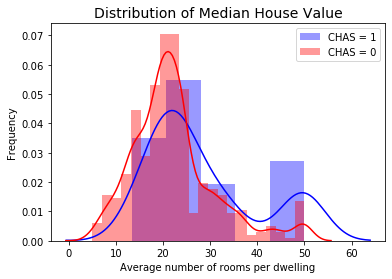

In [20]:
# Extract subsets of the dataframe for houses on the Charles River (ry) vs houses not on it (rn)
ry = df.loc[df['CHAS'] == 1]
rn = df.loc[df['CHAS'] == 0]

# Overlay a distplot for each on the same plot for comparison
sns.distplot(ry['MEDV'], color='b', label = "CHAS = 1")
sns.distplot(rn['MEDV'], color='r', label = "CHAS = 0")

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value', fontsize=14)
plt.legend()

Although the histograms of the two data sets look quite different, the shapes of the kernal density estimate plots are not dissimilar - although it can be said with reasonable confidence that the values of houses on the Charles River appear to be generally higher than those not on it. We will have to confirm this now by carrying out statistical tests using scipy.

### T-Test

We can carry out a t-test using scipy.stats to check if there is a significant difference in median house prices between those along the Charles River and those that are not. We need to use an independent t-test. Usage of t-test generally requires 6 assumptions (but exceptions can be made):
1. The dependent variable should be measured on a continuous scale.
    1. This is our MEDV variable, assumption holds true
2. The independent variable should consist of two categorical, independent groups.
    1. This is the CHAS variable, assumption holds true
3. You should have independence of observations
    1. There is no relationship between observations in each group or between groups, assumption holds true
4. There should be no significant outliers.
    1. This will have to be checked - it may be an issue
5. The dependent variable should be approximately normally distributed for each group of the independent variable.
    1. This will have to be checked - it may be an issue
6. There needs to be homogeneity of variances.
    1. This will have to be checked - it may be an issue

#### Assumption 4 Resolution

Unfortunately, our earlier box and whisker plot indicated that the MEDV column included a significant number of (high) outliers. We can try creating a subset of the DataFrame with only rows where the MEDV value is below a certain number.

In [21]:
# Select rows with MEDV < 36 (from trial and error)
dfSubset = df.query("MEDV < 36")
dfSubset.count()

CRIM       462
ZN         462
INDUS      462
CHAS       462
NOX        462
RM         462
AGE        462
DIS        462
RAD        462
TAX        462
PTRATIO    462
B          462
LSTAT      462
MEDV       462
dtype: int64

This leaves us with 462 rows out of the original 506, still more than 90% of the dataset to work with. Creating a box and whisker plot shows that no more outliers are present:

Text(0.5, 1.0, 'Distribution of Median House Value (with outliers removed)')

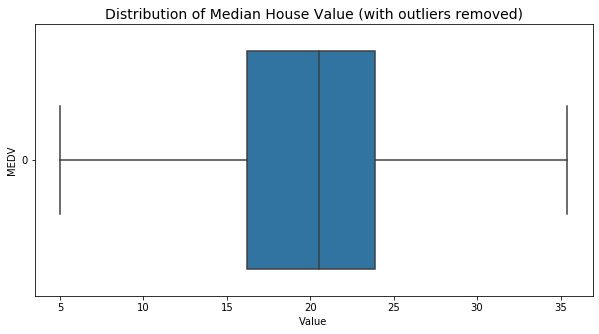

In [22]:
plt.figure(figsize = (10,5)) # Widen figure for better appreciation of shape
sns.boxplot(data=dfSubset["MEDV"], orient="h")
plt.xlabel('Value')
plt.ylabel('MEDV')
plt.title('Distribution of Median House Value (with outliers removed)', fontsize=14)

Assumption 4 is now resolved.

#### Assumption 5 Resolution

There are different ways of checking for normality, fortunately statsmodel incorporates a Shapiro-Wilk test for normaility.

In [23]:
ss.shapiro(dfSubset["MEDV"])

(0.9889508485794067, 0.001468385336920619)

The p-value is approx. 0.0015 - this is unfortunately not quite good enough to presume normality as a p-value of 0.05 is generally the lower bound for significance. However, this may not be an issue - a sufficiently large sample size (N>50) measns we can ignore this assumption!

#### Assumption 6 Resolution

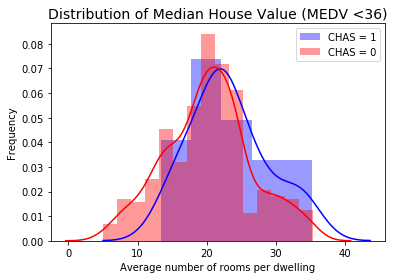

In [24]:
# Extract subsets of the dataframe for houses on the Charles River (ry) vs houses not on it (rn)
rys = dfSubset.loc[dfSubset['CHAS'] == 1]
rns = dfSubset.loc[dfSubset['CHAS'] == 0]

# Overlay a distplot for each on the same plot for comparison
sns.distplot(rys['MEDV'], color='b', label = "CHAS = 1")
sns.distplot(rns['MEDV'], color='r', label = "CHAS = 0")

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value (MEDV <36)', fontsize=14)
plt.legend()

The final assumption requires a test of variance. SciPy can implement the Levene test:

In [25]:
ss.levene(ry['MEDV'], rn['MEDV'], center='median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

Our p value unfortunately indicates that the null hypothesis (that homogeneity of varainces exists) is rejected. This does not mean that we cannot carrout out a t-test - it just means that we have to carry out a specific type, called a Welch's t-test.

#### T-Test Implementation

The null hypothesis here is that the means are equal. Therefore if there is no significant difference between the means, the t-statistic should be close to 0.

First we need MEDV split into two separate sets - one where CHAS=0 and one where CHAS=1. This has already been carried out to generate the histograms above:
* rns = dataframe containing only data on houses not along the Charles River (subset where MEDV < 36)
* rys = dataframe containing only data on houses along the Charles River (subset where MEDV < 36)

We can now finally use statsmodel's t-test function.

In [26]:
# equal_var=False to force use of Welch's t-test
ss.ttest_ind(rns['MEDV'], rys['MEDV'], equal_var=False)

Ttest_indResult(statistic=-2.606848398069803, pvalue=0.013854478784092262)

Results:
* t-Statistic: -2.607
* p-value: 0.014

#### p-value
We generally accept a p-value of 0.05 as being the lower bound of whether a relationship is significant or not. Our calculated p-value is somewhat lower than this, we can therefore conclude that there is a significant difference between the means - in other words we reject the null hypothesis and can state that there is a significant difference in median house prices between those on the Charles River and those not on it.

### Conclusions

We can conclude that the difference in the means is statistically significant. However we should caveat this - earlier we noted that an issue with the MEDV values - the distribution of the values indicate that the value above 50 have been truncated for some reason, this would certainly have an effect on the means. We dealt with this by removing outliers, but use of the full dataset would of course be preferable.

## Predict

We will now use the keras package to create a neural network to predict the median house price based on the datasets other variables.

### Choosing Correlated Variables

Firstly we can cenerate a correlation plot using NumPy and Seaborn to check which variables correlate with each other.

Text(0.5, 1, 'Heatmap of Correlations between Variables')

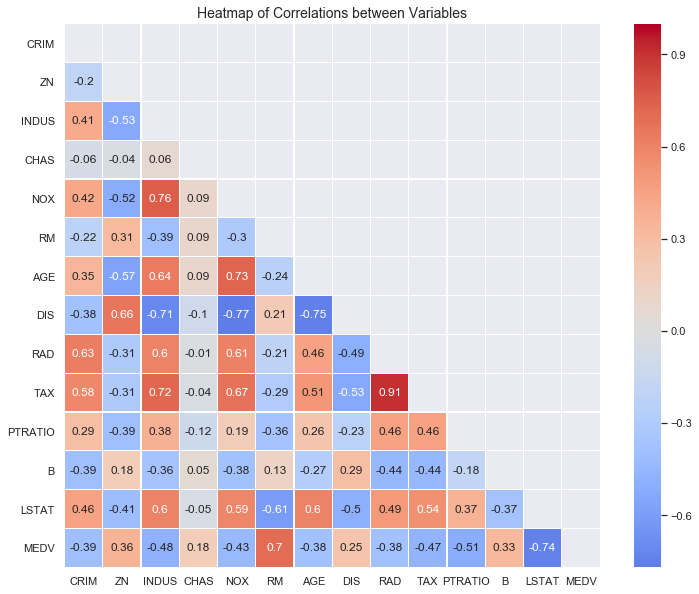

In [27]:
# Seaborn heatmap
sns.set(style='dark')

# Mask upper triangle
# Import numpy for array functions
import numpy as np
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12,10))
sns.heatmap(df.corr().round(2), annot=True, mask=mask, cmap='coolwarm', center=0, linewidths=0.2)

plt.title('Heatmap of Correlations between Variables', fontsize=14)

We are of course mostly interested in which correlate most strongly (either positively or negatively) with MEDV. Lets take the top 6:
* INDUS: -0.48
* NOX: -0.43
* RM: 0.7
* TAX: -0.47
* PTRATIO: -0.51
* LSTAT: -0.74
    
We can use these as inputs for the model by creating a new DataFrame using only the 6 required columns.

In [28]:
inputs = dfSubset[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
inputs.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,11.519957,0.557831,6.165803,416.181818,18.658009,13.418983
std,6.768981,0.117763,0.569855,169.000756,2.034563,6.979870
min,0.740000,0.385000,3.561000,187.000000,12.600000,1.980000
25%,5.860000,0.453000,5.872500,284.250000,17.450000,7.835000
50%,9.900000,0.538000,6.157500,341.000000,19.100000,12.300000
75%,18.100000,0.624000,6.486500,666.000000,20.200000,17.277500
max,27.740000,0.871000,8.780000,711.000000,22.000000,37.970000


We must also indicate the outputs:

In [29]:
outputs = dfSubset['MEDV']

### Split Dataset

We need to split the dataset into a training dataset and a testing dataset. The training data will be used for the model build, whereas the testing dataset will be used for validation. Scikit-learn includes a very convenient function for this.

In [30]:
import sklearn.model_selection as mod
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.2)

Lets have a look at our inputs:

In [31]:
print(inputs_train.describe())
print(inputs_test.describe())

            INDUS         NOX          RM         TAX     PTRATIO       LSTAT
count  369.000000  369.000000  369.000000  369.000000  369.000000  369.000000
mean    11.680732    0.559934    6.162707  415.349593   18.639566   13.699946
std      6.820855    0.116750    0.580664  169.573938    2.086566    7.226425
min      1.220000    0.385000    3.561000  188.000000   12.600000    2.940000
25%      5.860000    0.460000    5.868000  284.000000   17.400000    7.900000
50%      9.900000    0.538000    6.153000  337.000000   19.200000   12.340000
75%     18.100000    0.647000    6.495000  666.000000   20.200000   17.600000
max     27.740000    0.871000    8.780000  711.000000   22.000000   37.970000
           INDUS        NOX         RM         TAX    PTRATIO      LSTAT
count  93.000000  93.000000  93.000000   93.000000  93.000000  93.000000
mean   10.882043   0.549484   6.178086  419.483871  18.731183  12.304194
std     6.556087   0.121990   0.527572  167.575785   1.822205   5.802130
min   

We can also look at the outputs:

In [32]:
print(outputs_train.describe())
print(outputs_test.describe())

count    369.000000
mean      20.248509
std        6.370866
min        5.000000
25%       15.700000
50%       20.400000
75%       23.800000
max       35.400000
Name: MEDV, dtype: float64
count    93.000000
mean     21.247312
std       6.042865
min       5.000000
25%      17.800000
50%      20.900000
75%      24.400000
max      34.900000
Name: MEDV, dtype: float64


### Build Neural Network

#### Preprocessing

Preprocessing can help models to run more accurately and effectively by preparing the data into a more suitable form. Scaling is one such useful technique - it both normalises (transforms all values to between 0 and 1) and standardises (centres the mean at 0) all values - this helps to ensure that larger variable values don't overwhelm smaller ones in the neural network.

##### Scaling

In [33]:
from sklearn import preprocessing
# Use the PowerTransformer scaler to increase normality
scaler = preprocessing.PowerTransformer()

In [34]:
inputs_train_scaled = pd.DataFrame(scaler.fit_transform(inputs_train), columns=inputs.columns)

In [35]:
inputs_train_scaled.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02,3.690000e+02
mean,-3.986573e-17,-6.468779e-18,-4.302114e-16,-9.281269e-15,-1.684891e-16,3.876754e-16
std,1.001358e+00,1.001358e+00,1.001358e+00,1.001358e+00,1.001358e+00,1.001358e+00
min,-1.958778e+00,-1.931170e+00,-3.884756e+00,-2.098192e+00,-1.985502e+00,-2.364629e+00
25%,-7.895481e-01,-8.795928e-01,-5.369753e-01,-7.360930e-01,-8.032983e-01,-7.822319e-01
50%,-1.032953e-01,-2.784567e-02,-4.956277e-02,-2.469618e-01,9.861178e-02,3.049853e-02
75%,9.504089e-01,8.660103e-01,5.561188e-01,1.339569e+00,7.595322e-01,7.116907e-01
max,1.909074e+00,2.024306e+00,5.170352e+00,1.465708e+00,2.308443e+00,2.272987e+00


In [36]:
inputs_test_scaled = pd.DataFrame(scaler.fit_transform(inputs_test), columns=inputs.columns)

In [37]:
inputs_test_scaled.describe()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
count,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01
mean,3.223228e-16,-4.244215e-15,-4.942283e-16,1.161198e-14,6.852344e-16,-4.417016e-17
std,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00,1.005420e+00
min,-2.102081e+00,-1.663517e+00,-3.430426e+00,-2.230504e+00,-2.200995e+00,-2.456318e+00
25%,-7.878419e-01,-9.423642e-01,-6.090427e-01,-7.071088e-01,-7.070495e-01,-7.352396e-01
50%,-9.955674e-03,1.110112e-01,-9.467211e-02,-2.310838e-01,4.139432e-02,3.517084e-02
75%,1.075648e+00,7.896800e-01,5.032672e-01,1.340785e+00,8.490699e-01,7.526975e-01
max,1.830105e+00,1.939201e+00,2.758234e+00,1.340785e+00,1.747521e+00,2.467847e+00


#### Keras

In [38]:
# Create a new neural network.
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


There are many different ways to build a neural network, the accuracy will depend on the approach we take.

In [39]:
earlystop = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='min', restore_best_weights=True)

##### Defining Functions

It will be useful to create some functions now as some of the following work will be repetitive.

In [40]:
# Function that carries out the keras.evaluate() function and prints to a specified format
def evaluator(evalN, modelN):
    evalN = modelN.evaluate(inputs_test_scaled, outputs_test, verbose=0)
    print('This model evaluates as:')
    print('* Loss:', evalN[0])
    print('* MAE:', evalN[1])
    print('* Accuracy:', evalN[2])

In [41]:
# Function that carries out the keras.predict() function and prints to a specified format
def predictor(predN, modelN):
    predN = modelN.predict(inputs_test_scaled.as_matrix()[0:1])
    print('This model predicts as:')
    print('* Predicted Value:', predN[0][0])
    print('* Actual value:', outputs_test[0:1].iloc[0])

#### First Attempt

This will be a three layer neural network with densities of 32, 16 and 1.

##### Construct Model

In [42]:
model1 = Sequential() 

model1.add(Dense(units=32, activation='relu', input_dim=6))
model1.add(Dense(units=16, activation='relu'))
model1.add(Dense(units=1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [43]:
history1 = model1.fit(inputs_train_scaled, outputs_train, epochs=500, validation_split=0.25, callbacks=[earlystop])

Instructions for updating:
Use tf.cast instead.
Train on 276 samples, validate on 93 samples
Epoch 1/500
276/276 [==============================] - 0s 396us/step - loss: 436.5150 - mae: 19.9293 - acc: 0.0000e+00 - val_loss: 493.9588 - val_mae: 21.2072 - val_acc: 0.0000e+00
Epoch 2/500
276/276 [==============================] - 0s 56us/step - loss: 435.3344 - mae: 19.8916 - acc: 0.0000e+00 - val_loss: 492.9267 - val_mae: 21.1769 - val_acc: 0.0000e+00
Epoch 3/500
276/276 [==============================] - 0s 57us/step - loss: 434.1493 - mae: 19.8533 - acc: 0.0000e+00 - val_loss: 491.8592 - val_mae: 21.1451 - val_acc: 0.0000e+00
Epoch 4/500
276/276 [==============================] - 0s 57us/step - loss: 432.9837 - mae: 19.8148 - acc: 0.0000e+00 - val_loss: 490.7733 - val_mae: 21.1127 - val_acc: 0.0000e+00
Epoch 5/500
276/276 [==============================] - 0s 57us/step - loss: 431.7468 - mae: 19.7749 - acc: 0.0000e+00 - val_loss: 489.7083 - val_mae: 21.0805 - val_acc: 0.0000e+00
Epoch 

In [44]:
evaluate1 = []
evaluator(evaluate1, model1)

This model evaluates as:
* Loss: 14.881394068400065
* MAE: 2.8289809226989746
* Accuracy: 0.01075268816202879


In [45]:
predict1 = []
predictor(predict1, model1)

This model predicts as:
* Predicted Value: 25.1108
* Actual value: 26.7


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Results

Our basic, three layer model run with the data as-is didn't perform particularly well, although it was converging towards a solution. Normalising the data definitely made a significant improvement. We can now move on to developing the structure of the model itself to improve the accuracy.

#### Second Attempt - Widen

We will develop the model more and widen it now by doubling the number of units in each hidden layer.

##### Construct Model

In [46]:
model2 = Sequential() 

model2.add(Dense(units=64, activation='relu', input_dim=6))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=1))

model2.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


##### Training

In [47]:
history2 = model2.fit(inputs_train_scaled, outputs_train, epochs=500, validation_split=0.25, callbacks=[earlystop])

Train on 276 samples, validate on 93 samples
Epoch 1/500
276/276 [==============================] - 0s 400us/step - loss: 422.7012 - mae: 19.5634 - acc: 0.0000e+00 - val_loss: 469.7455 - val_mae: 20.6137 - val_acc: 0.0000e+00
Epoch 2/500
276/276 [==============================] - 0s 56us/step - loss: 403.9882 - mae: 19.0502 - acc: 0.0000e+00 - val_loss: 450.0574 - val_mae: 20.1126 - val_acc: 0.0000e+00
Epoch 3/500
276/276 [==============================] - 0s 57us/step - loss: 383.9835 - mae: 18.4876 - acc: 0.0000e+00 - val_loss: 427.7768 - val_mae: 19.5338 - val_acc: 0.0000e+00
Epoch 4/500
276/276 [==============================] - 0s 57us/step - loss: 360.9303 - mae: 17.8297 - acc: 0.0000e+00 - val_loss: 400.2854 - val_mae: 18.8126 - val_acc: 0.0000e+00
Epoch 5/500
276/276 [==============================] - 0s 0us/step - loss: 332.2279 - mae: 16.9969 - acc: 0.0000e+00 - val_loss: 365.9420 - val_mae: 17.8835 - val_acc: 0.0108
Epoch 6/500
276/276 [==============================] - 0s 5

In [48]:
evaluate2 = []
evaluator(evaluate2, model2)

This model evaluates as:
* Loss: 14.844749666029408
* MAE: 2.69608211517334
* Accuracy: 0.0


In [49]:
predict2 = []
predictor(predict2, model2)

This model predicts as:
* Predicted Value: 28.076227
* Actual value: 26.7


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Results

More accurate than the previous attempt.

#### Third Attempt - Deepen

We will develop the second attempt model and deepen it now by adding another 2 hidden layers.

##### Construct Model

In [50]:
model3 = Sequential() 

model3.add(Dense(units=256, activation='relu', input_dim=6))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=32, activation='relu'))
model3.add(Dense(units=1))

model3.compile(loss='mse', optimizer='adam', metrics=['mae', 'acc'])

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               1792      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 45,057
Trainable params: 45,057
Non-trainable params: 0
_________________________________________________________________


##### Training

In [51]:
history3 = model3.fit(inputs_train_scaled, outputs_train, epochs=500, validation_split=0.25, callbacks=[earlystop])

Train on 276 samples, validate on 93 samples
Epoch 1/500
276/276 [==============================] - 0s 622us/step - loss: 431.6107 - mae: 19.7958 - acc: 0.0000e+00 - val_loss: 471.1771 - val_mae: 20.6672 - val_acc: 0.0000e+00
Epoch 2/500
276/276 [==============================] - 0s 56us/step - loss: 389.7764 - mae: 18.7120 - acc: 0.0000e+00 - val_loss: 398.3474 - val_mae: 18.8494 - val_acc: 0.0000e+00
Epoch 3/500
276/276 [==============================] - 0s 57us/step - loss: 284.6864 - mae: 15.6498 - acc: 0.0000e+00 - val_loss: 220.6944 - val_mae: 13.6886 - val_acc: 0.0000e+00
Epoch 4/500
276/276 [==============================] - 0s 57us/step - loss: 102.6175 - mae: 8.6295 - acc: 0.0036 - val_loss: 53.0355 - val_mae: 5.8626 - val_acc: 0.0000e+00
Epoch 5/500
276/276 [==============================] - 0s 57us/step - loss: 66.7711 - mae: 6.6070 - acc: 0.0036 - val_loss: 49.4656 - val_mae: 5.7956 - val_acc: 0.0000e+00
Epoch 6/500
276/276 [==============================] - 0s 57us/step -

In [52]:
evaluate3 = []
evaluator(evaluate3, model3)

This model evaluates as:
* Loss: 14.801992375363586
* MAE: 2.6863021850585938
* Accuracy: 0.01075268816202879


In [53]:
predict3 = []
predictor(predict3, model3)

This model predicts as:
* Predicted Value: 27.77779
* Actual value: 26.7


C:\Users\Peter McGowan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##### Results

Deepening the model by adding another hidden layer has helped to increase the accuracy - therefore we can be reasonably confident that deeping the model is effective. 

##### Next Section

In [54]:
print(history1.history.keys())

dict_keys(['val_loss', 'val_mae', 'val_acc', 'loss', 'mae', 'acc'])


In [55]:
print(model1.evaluate(inputs_test_scaled, outputs_test))
print(model2.evaluate(inputs_test_scaled, outputs_test))
print(model3.evaluate(inputs_test_scaled, outputs_test))

93/93 [==============================] - 0s 0us/step
[14.881394068400065, 2.8289809226989746, 0.01075268816202879]
93/93 [==============================] - 0s 0us/step
[14.844749666029408, 2.69608211517334, 0.0]
93/93 [==============================] - 0s 0us/step
[14.801992375363586, 2.6863021850585938, 0.01075268816202879]


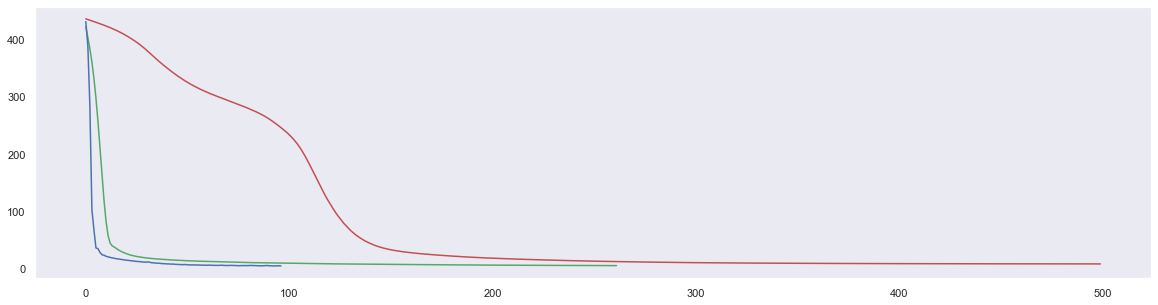

In [56]:
plt.figure(figsize=(20,5))
plt.plot(history1.history['loss'], color='r')
plt.plot(history2.history['loss'], color='g')
plt.plot(history3.history['loss'], color='b')

*** adjust the below to output what i want

*** https://keras.io/visualization/

*** https://www.geeksforgeeks.org/python-pandas-dataframe-keys/

*** https://www.tensorflow.org/guide/keras/train_and_evaluate

*** https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

***https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

*** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

*** https://thestatsgeek.com/2013/09/28/the-t-test-and-robustness-to-non-normality/

*** https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

*** https://www.statisticshowto.datasciencecentral.com/welchs-test-for-unequal-variances/

*** https://www.statisticshowto.datasciencecentral.com/normalized/


*** https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

*** https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

*** https://www.dlology.com/blog/quick-notes-on-how-to-choose-optimizer-in-keras/
*** https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
*** https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

*** http://benalexkeen.com/feature-scaling-with-scikit-learn/

*** https://scikit-learn.org/stable/modules/preprocessing.html
*** http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html

### References

<a name="myfootnote1">1</a>: Laerd Statistics - Histograms, https://statistics.laerd.com/statistical-guides/understanding-histograms.php  
<a name="myfootnote2">2</a>: Mathisonian - KDE, https://mathisonian.github.io/kde/  